In [2]:
import pandas as pd

In [3]:
# Read and store data in dataframe fluprint_data
fluprint_data = pd.read_csv("C:\\Users\\indra\\OneDrive\\Bureaublad\\LSAoBD.practicals\\R Project\\fluprint_export.csv")

# Summary of 'geo_mean', 'vaccine_response' and 'name_formatted'
fluprint_data.describe(include='all').loc[:, ['geo_mean', 'vaccine_response', 'name_formatted']]

,geo_mean,vaccine_response,name_formatted
count,156118.000000,112456.000000,156118
unique,NaN,NaN,3283
top,NaN,NaN,L50_FASL
freq,NaN,NaN,555
mean,30.242540,0.300927,NaN
std,40.040675,0.458663,NaN
min,0.000000,0.000000,NaN
25%,2.150000,0.000000,NaN
50%,20.000000,0.000000,NaN
75%,47.570000,1.000000,NaN


In [4]:
fluprint_data.head()

,donor_id,study_id,gender,race,visit_id,visit_year,visit_day,visit_type_hai,visit_age,cmv_status,...,vaccinated_2yr_prior,vaccine_type_2yr_prior,vaccinated_3yr_prior,vaccine_type_3yr_prior,vaccinated_4yr_prior,vaccine_type_4yr_prior,vaccinated_5yr_prior,vaccine_type_5yr_prior,influenza_infection_history,influenza_hospitalization
0,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
1,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
2,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
3,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
4,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0


In [5]:
# Remove the rows with missing values for 'vaccine_response'
fluprint_data.dropna(subset=['vaccine_response'], inplace=True)
fluprint_data

,donor_id,study_id,gender,race,visit_id,visit_year,visit_day,visit_type_hai,visit_age,cmv_status,...,vaccinated_2yr_prior,vaccine_type_2yr_prior,vaccinated_3yr_prior,vaccine_type_3yr_prior,vaccinated_4yr_prior,vaccine_type_4yr_prior,vaccinated_5yr_prior,vaccine_type_5yr_prior,influenza_infection_history,influenza_hospitalization
0,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
1,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
2,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
3,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
4,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155973,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0,0
155974,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0,0
155975,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0,0
155976,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0,0


In [6]:
print(fluprint_data['vaccine_response'].isna().sum())

0


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
def assess_data_quality(fluprint_data):
     # Check for duplicate rows
    print("\nDuplicate rows:", fluprint_data.duplicated().sum())
    
    # Check data types
    print("\nData types:\n", fluprint_data.dtypes)

# Perform data quality assessment
assess_data_quality(fluprint_data)


Duplicate rows: 0

Data types:
 donor_id                         int64
study_id                         int64
gender                          object
race                            object
visit_id                         int64
visit_year                       int64
visit_day                        int64
visit_type_hai                  object
visit_age                      float64
cmv_status                     float64
ebv_status                     float64
bmi                            float64
vaccine                        float64
geo_mean                       float64
d_geo_mean                     float64
vaccine_response               float64
mesurment_id                     int64
assay                            int64
name                            object
name_formatted                  object
subset                          object
units                           object
data                           float64
statin_use                     float64
flu_vaccination_history        

In [9]:
# Set data type of 'vaccine_response' to 'int64' because 'vaccine_response' represents a discrete categorie (0 = low responder, 1 = high responder)
fluprint_data['vaccine_response'] = fluprint_data['vaccine_response'].astype('int64')

# Set data type of 'donor_id' to 'object' because 'donor_id' represents an identifier
fluprint_data['donor_id'] = fluprint_data['donor_id'].astype('object')

print(fluprint_data.dtypes)

donor_id                        object
study_id                         int64
gender                          object
race                            object
visit_id                         int64
visit_year                       int64
visit_day                        int64
visit_type_hai                  object
visit_age                      float64
cmv_status                     float64
ebv_status                     float64
bmi                            float64
vaccine                        float64
geo_mean                       float64
d_geo_mean                     float64
vaccine_response                 int64
mesurment_id                     int64
assay                            int64
name                            object
name_formatted                  object
subset                          object
units                           object
data                           float64
statin_use                     float64
flu_vaccination_history        float64
total_vaccines_received  

In [10]:
# Make the dataframe more compact and remove unnecessary columns
columns_to_keep = ['donor_id', 'vaccine_response', 'name_formatted', 'subset', 'units', 'data']
fluprint_clean_data = fluprint_data[columns_to_keep]
fluprint_clean_data

,donor_id,vaccine_response,name_formatted,subset,units,data
0,813,0,B_cells,CD14-CD33-/CD3-/CD19+CD20+,% of Parent,34.40
1,813,0,basophils,CD123+HLADR-,% of Parent,1.45
2,813,0,CD16_pos_monocytes,CD14+CD33+/CD16+,% of Parent,5.85
3,813,0,CD16_pos_CD14_pos_monocytes,CD14+CD33+/CD14+CD16+,% of Parent,1.55
4,813,0,CD16_pos_CD14_neg_monocytes,CD14+CD33+/CD14-CD16+,% of Parent,4.46
...,...,...,...,...,...,...
155973,2,0,TNFB,TNFB,Z.log2,1.72
155974,2,0,TRAIL,TRAIL,Z.log2,0.42
155975,2,0,VCAM1,VCAM1,Z.log2,1.05
155976,2,0,VEGF,VEGF,Z.log2,0.54


In [11]:
# Make a dataframe that only contains the rows with measurements of cells ('% of Parent')
fluprint_clean = fluprint_clean_data[fluprint_clean_data['units'] == '% of Parent']
fluprint_clean

,donor_id,vaccine_response,name_formatted,subset,units,data
0,813,0,B_cells,CD14-CD33-/CD3-/CD19+CD20+,% of Parent,34.40
1,813,0,basophils,CD123+HLADR-,% of Parent,1.45
2,813,0,CD16_pos_monocytes,CD14+CD33+/CD16+,% of Parent,5.85
3,813,0,CD16_pos_CD14_pos_monocytes,CD14+CD33+/CD14+CD16+,% of Parent,1.55
4,813,0,CD16_pos_CD14_neg_monocytes,CD14+CD33+/CD14-CD16+,% of Parent,4.46
...,...,...,...,...,...,...
155845,3,0,Th2_non_neg_TFH_CD8_pos_T_cells,CD14-CD33-/CD3+/CD4-CD8+/Non-naive CD8+/CXCR5-...,% of Parent,9.71
155846,3,0,Th2_TFH_CD4_pos_T_cells,CD14-CD33-/CD3+/CD4+CD8-/Non-naive CD4+/CXCR5+...,% of Parent,34.90
155847,3,0,Th2_TFH_CD8_pos_T_cells,CD14-CD33-/CD3+/CD4-CD8+/Non-naive CD8+/CXCR5+...,% of Parent,1.84
155848,3,0,transitional_B_cells,CD14-CD33-/CD3-/CD19+CD20+/CD24+CD38+,% of Parent,6.51


In [12]:
# Find duplicates of 'name_formatted' for one 'donor_id' and remove them so we can pivote the dataframe
# Find duplicates
duplicates = fluprint_clean[fluprint_clean.duplicated(subset=['donor_id', 'name_formatted'], keep=False)]
print(duplicates)

# Remove the duplicates
flu_cells_clean_unique = fluprint_clean.drop_duplicates(subset=['donor_id', 'name_formatted'])

      donor_id  vaccine_response       name_formatted  \
88836      325                 0              B_cells   
88837      325                 0              B_cells   
88838      325                 0              B_cells   
88847      325                 0  CD3_neg_lymphocytes   
88848      325                 0  CD3_neg_lymphocytes   
...        ...               ...                  ...   
98141      263                 0              T_cells   
98142      263                 0              T_cells   
98143      263                 0              T_cells   
98144      263                 0              T_cells   
98145      263                 0              T_cells   

                                 subset        units  data  
88836     B cell: Lymph/CD3-/CD19+CD20+  % of Parent  40.4  
88837  CXCR3 FMO: Lymph/CD3-/CD19+CD20+  % of Parent  58.3  
88838      CXCR3: Lymph/CD3-/CD19+CD20+  % of Parent  49.6  
88847                B cell: Lymph/CD3-  % of Parent  15.2  
88848     


Number of outliers (Z-score > 3):
 0


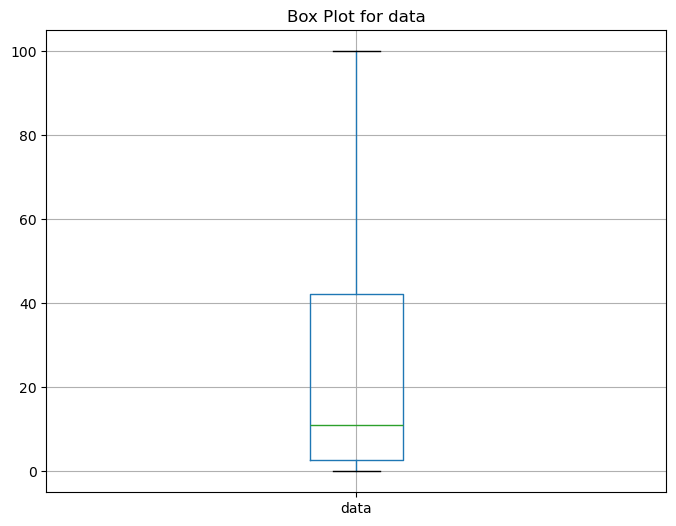

In [13]:
# Look if there are outliers in the 'data' column
z_scores = stats.zscore(flu_cells_clean_unique['data'])
outliers = (np.abs(z_scores) > 3).sum(axis=0)
print("\nNumber of outliers (Z-score > 3):\n", outliers)

# Boxplot visualisation of 'data' values 
plt.figure(figsize=(8, 6))
flu_cells_clean_unique.boxplot(column=['data'])
plt.title('Box Plot for data')
plt.show()

In [14]:
# Pivot the cell data to create a new dataframe where each 'donor_id' is a row
# Each cell in 'name_formatted' becomes a column, and the corresponding 'data' values fill the cells
pivoted_df = flu_cells_clean_unique.pivot(index='donor_id', columns='name_formatted', values='data')
print(pivoted_df.head(2))

name_formatted  B_cells  CD161_neg_CD45RA_pos_Tregs  \
donor_id                                              
3                  73.2                        41.6   
5                  57.7                        45.9   

name_formatted  CD161_pos_CD45RA_neg_Tregs  CD161_pos_CD45RA_pos_Tregs  \
donor_id                                                                 
3                                     3.49                        0.30   
5                                     3.64                        0.11   

name_formatted  CD161_pos_CD4_pos_T_cells  CD161_pos_CD8_pos_T_cells  \
donor_id                                                               
3                                    3.55                       9.07   
5                                    5.55                       8.90   

name_formatted  CD161_pos_NKT_cells  CD161_pos_NK_cells  \
donor_id                                                  
3                              83.9                40.7   
5               

In [15]:
# Make a dataframe with 'donor_id' and 'vaccine_response'
vaccine_response = fluprint_data.drop_duplicates(subset=['donor_id', 'vaccine_response'])[['donor_id', 'vaccine_response']]
vaccine_response = vaccine_response.dropna()

In [16]:
# Merge 'pivoted_df' with 'vaccine_response' by the 'donor_id'
merged = vaccine_response.merge(pivoted_df, on='donor_id')
print(merged)

    donor_id  vaccine_response  B_cells  CD161_neg_CD45RA_pos_Tregs  \
0        813                 0     34.4                       22.10   
1        812                 0     41.0                       23.80   
2        811                 0     34.6                       30.50   
3        810                 0     34.8                       29.00   
4        809                 0     40.8                        3.42   
..       ...               ...      ...                         ...   
299       10                 0     84.5                       34.20   
300        9                 0     71.2                       22.60   
301        8                 0     74.2                       20.90   
302        5                 0     57.7                       45.90   
303        3                 0     73.2                       41.60   

     CD161_pos_CD45RA_neg_Tregs  CD161_pos_CD45RA_pos_Tregs  \
0                          5.54                        1.66   
1                    

In [17]:
# Look at the correlation between the data of the other features and the 'vaccine_response'

# Calculate pairwise correlation coefficients between numerical columns in 'merged'
correlation = merged.corr()

# Sort correlations of 'vaccine_response' with other features
corr_response = correlation['vaccine_response'].sort_values(ascending=False)

# Display the most positively and negatively correlated features
print(corr_response.head())
print(corr_response.tail())

vaccine_response             1.000000
IL_neg_21_CD4_pos_T_cells    0.520964
Unstim_CD4_pos_T_cells       0.518184
PMA_Iono_CD4_pos_T_cells     0.516098
LPS_CD4_pos_T_cells          0.506828
Name: vaccine_response, dtype: float64
IL_neg_7_CD8_pos_T_cells    -0.593862
IL_neg_21_CD8_pos_T_cells   -0.594105
PMA_Iono_CD8_pos_T_cells    -0.594758
LPS_CD8_pos_T_cells         -0.599727
Unstim_CD8_pos_T_cells      -0.605982
Name: vaccine_response, dtype: float64


In [18]:
# Look how many donors have data for every cell type
non_na_counts = merged.notna().sum()
print(non_na_counts)

donor_id                      304
vaccine_response              304
B_cells                       294
CD161_neg_CD45RA_pos_Tregs    294
CD161_pos_CD45RA_neg_Tregs    294
                             ... 
naive_CD4_pos_T_cells         294
naive_CD8_pos_T_cells         294
pDCs                          164
plasmablasts                  294
transitional_B_cells          294
Length: 413, dtype: int64


In [19]:
# Combine 'corr_response' and 'non_na_counts' into a single dataframe
combined_df = pd.DataFrame({
    'Corr_response': corr_response,
    'Non_Na_Counts': non_na_counts
})

# Sort by correlation values 
combined_df = combined_df.sort_values(by='Corr_response', ascending=False)
print(combined_df)

                           Corr_response  Non_Na_Counts
vaccine_response                1.000000            304
IL_neg_21_CD4_pos_T_cells       0.520964             18
Unstim_CD4_pos_T_cells          0.518184             18
PMA_Iono_CD4_pos_T_cells        0.516098             18
LPS_CD4_pos_T_cells             0.506828             18
...                                  ...            ...
IL_neg_7_CD8_pos_T_cells       -0.593862             18
IL_neg_21_CD8_pos_T_cells      -0.594105             18
PMA_Iono_CD8_pos_T_cells       -0.594758             18
LPS_CD8_pos_T_cells            -0.599727             18
Unstim_CD8_pos_T_cells         -0.605982             18

[413 rows x 2 columns]


In [20]:
# Filter the features with more than 290 measured values and with a absolute correlation to 'vaccine_response' of more than 0.1 
# Or filter the feature with 304 values to make sure that 'donor_id' is kept in the dataframe

# Apply the filter conditions 
filtered_df = combined_df[((combined_df['Non_Na_Counts'] > 290) & (combined_df['Corr_response'].abs() > 0.1)) | (combined_df['Non_Na_Counts'] == 304)] 

# Display all rows of the dataframe 
with pd.option_context('display.max_rows', None): 
    print(filtered_df)   

                                    Corr_response  Non_Na_Counts
vaccine_response                         1.000000            304
CD161_pos_CD45RA_pos_Tregs               0.263836            294
CD85j_pos_CD4_pos_T_cells                0.174133            294
T_cells                                  0.139733            294
CD161_pos_CD45RA_neg_Tregs               0.120417            294
donor_id                                -0.015260            304
central_memory_CD8_pos_T_cells          -0.101233            294
plasmablasts                            -0.106176            294
HLADR_pos_CD38_pos_CD8_pos_T_cells      -0.109893            294
HLADR_neg_CD38_pos_CD8_pos_T_cells      -0.117639            293
HLADR_pos_CD38_pos_CD4_pos_T_cells      -0.131227            294
HLADR_neg_CD38_pos_CD4_pos_T_cells      -0.141555            294


In [21]:
# Extract names from the index and use them to filter these columns out of the 'merged' dataframe
relevant_cells = filtered_df.index.tolist() 
df = merged[relevant_cells] 
print(df)

     vaccine_response  CD161_pos_CD45RA_pos_Tregs  CD85j_pos_CD4_pos_T_cells  \
0                   0                        1.66                       1.84   
1                   0                        0.43                       0.76   
2                   0                        0.51                       0.94   
3                   0                        0.17                       2.22   
4                   0                        0.20                       1.65   
..                ...                         ...                        ...   
299                 0                        0.08                       1.26   
300                 0                        0.08                       1.82   
301                 0                        0.24                       2.36   
302                 0                        0.11                       1.65   
303                 0                        0.30                       2.13   

     T_cells  CD161_pos_CD45RA_neg_Treg

In [22]:
# Determine the class balance for 'vaccine_response' which will be used as prediction target in machine learning
class_balance = df['vaccine_response'].value_counts(normalize=True)
print(class_balance)

vaccine_response
0    0.707237
1    0.292763
Name: proportion, dtype: float64


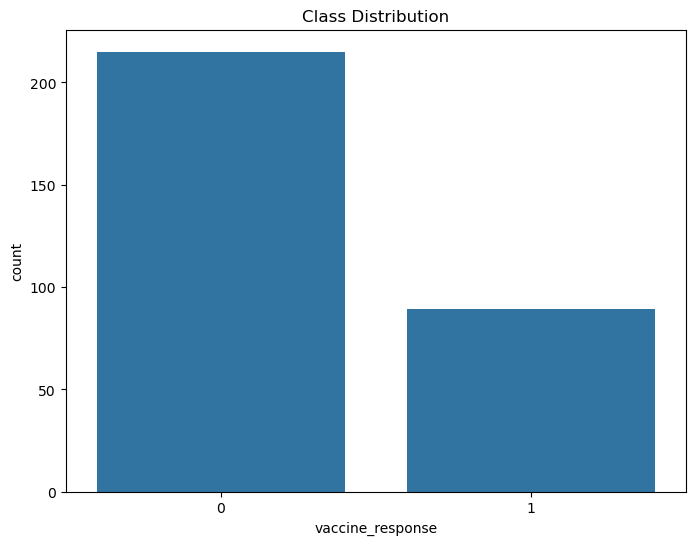

In [23]:
# Visualise class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='vaccine_response', data=df)
plt.title('Class Distribution')
plt.show()

In [24]:
# This class distribution is taken into account in the machine learning process

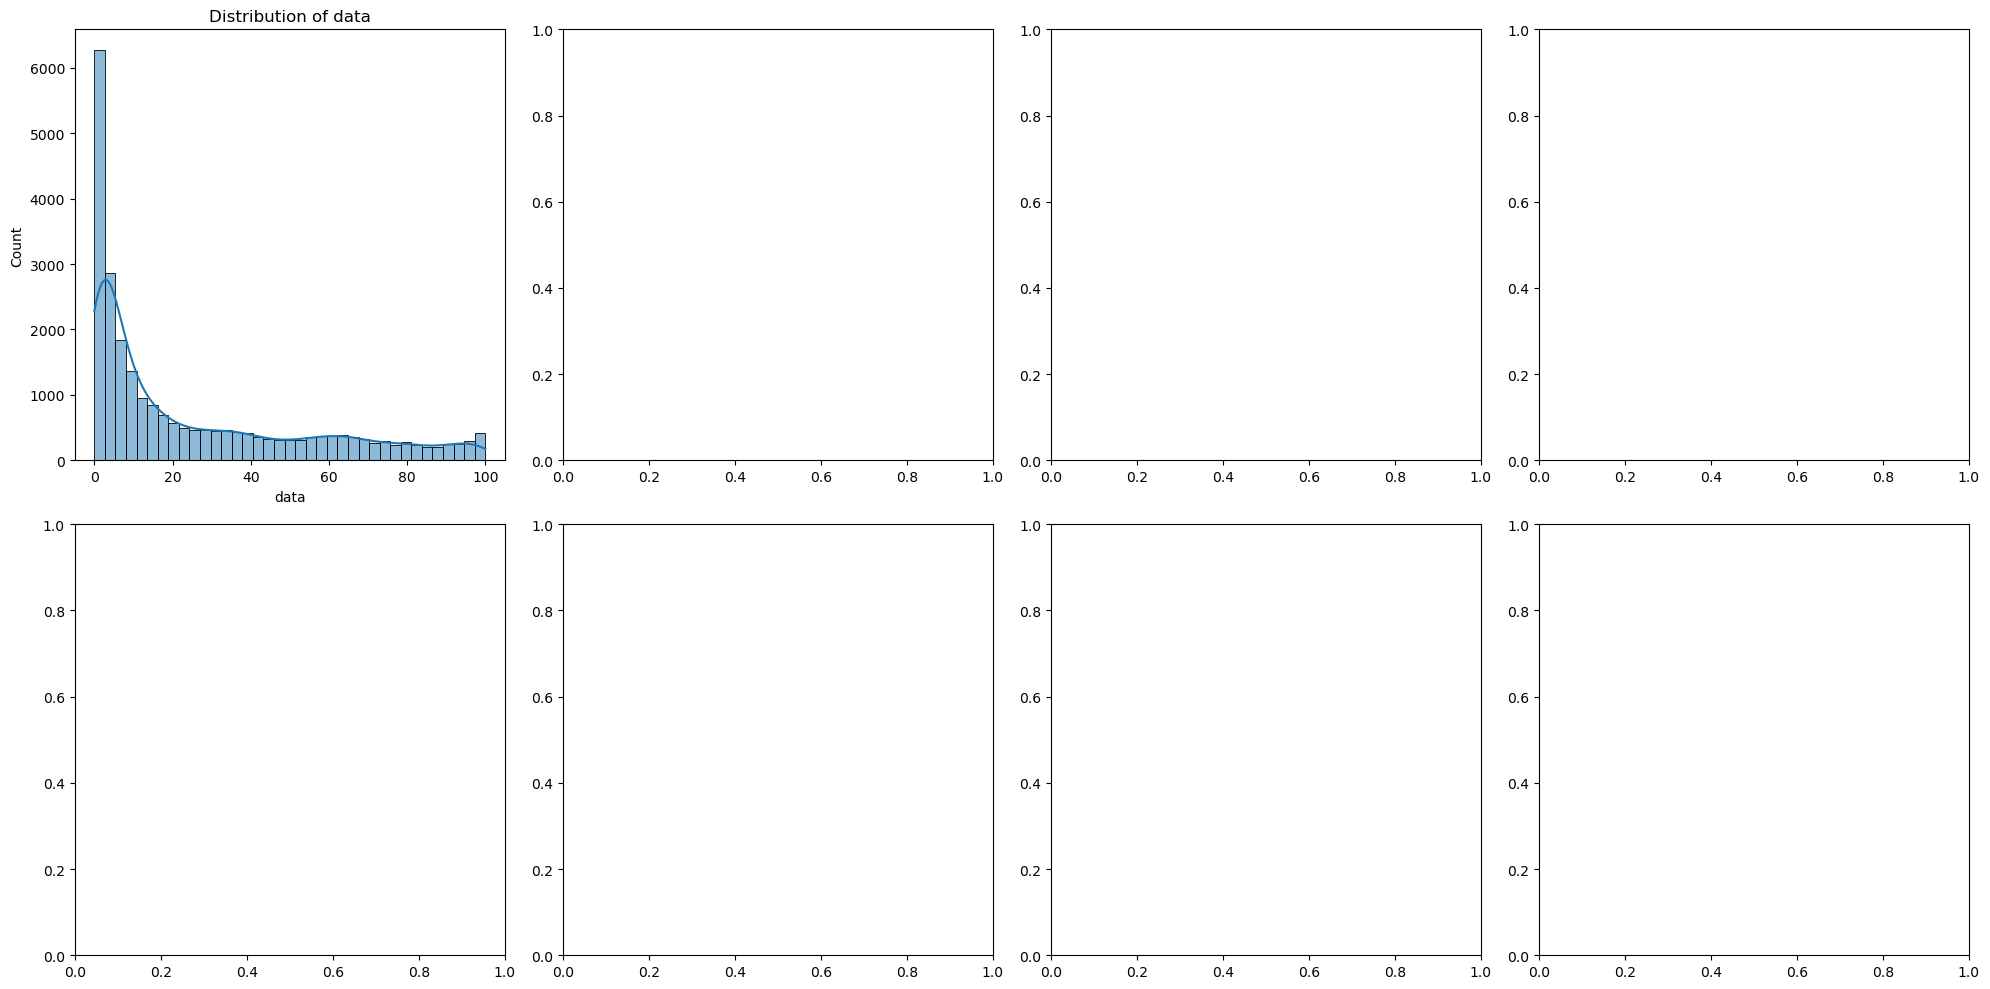

In [25]:
#4. Exploratory Data Analysis (EDA): Distribution of Numerical Features
numeric_cols = fluprint_clean.select_dtypes(include=['float64']).columns.tolist()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(fluprint_clean[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

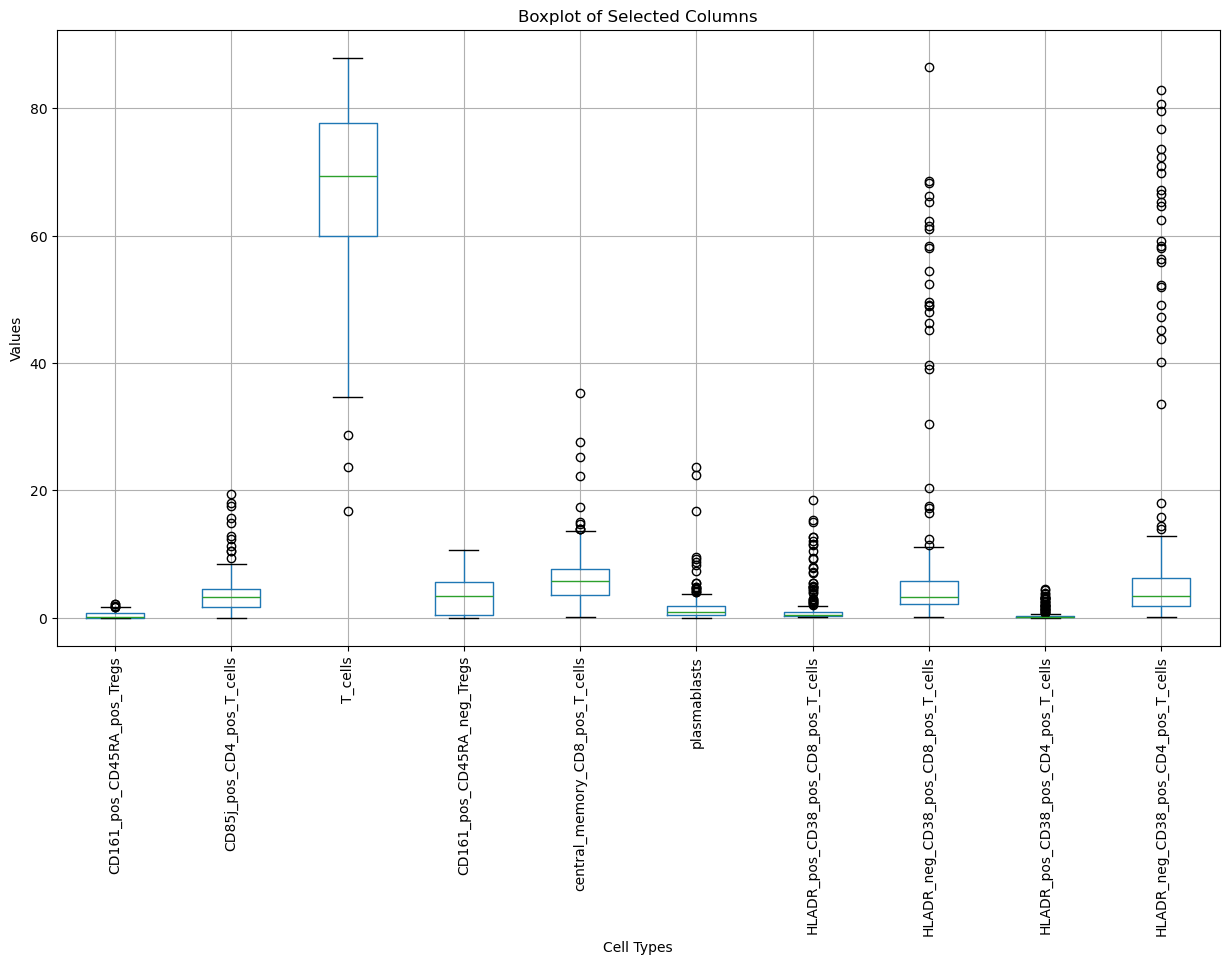

In [26]:
import matplotlib.pyplot as plt

# Look at the distribution of the values of the cell data
# Drop 'donor_id' and 'vaccine_response' and plot the boxplot
df.drop(['donor_id', 'vaccine_response'], axis=1).boxplot(figsize=(15, 8), rot=90)
plt.title("Boxplot of Selected Columns")
plt.ylabel("Values")
plt.xlabel("Cell Types")
plt.show()

In [27]:
# Standardisation will be carried out to account for the distribution of the values

In [28]:
# Set 'vaccine_response' as the prediction target
y = df.vaccine_response

In [29]:
# Keep the column names with cell information and set them as the predictive features
flu_features = ['CD161_pos_CD45RA_pos_Tregs',
       'CD85j_pos_CD4_pos_T_cells', 'T_cells', 'CD161_pos_CD45RA_neg_Tregs', 'central_memory_CD8_pos_T_cells', 'plasmablasts',
       'HLADR_pos_CD38_pos_CD8_pos_T_cells',
       'HLADR_neg_CD38_pos_CD8_pos_T_cells',
       'HLADR_pos_CD38_pos_CD4_pos_T_cells',
       'HLADR_neg_CD38_pos_CD4_pos_T_cells']
X = df[flu_features]

In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation datasets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

In [31]:
from imblearn.over_sampling import SMOTE

# Use SMOTE to take class imbalance into account
smote = SMOTE(random_state=42)
train_X_resampled, train_y_resampled = smote.fit_resample(train_X, train_y)

print("\nClass distribution after SMOTE:")
print(pd.Series(train_y_resampled).value_counts(normalize=True))

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [32]:
# Error due to missing values

In [33]:
# The amount of missing values for each column
na_counts = df.isna().sum()
print(na_counts)

vaccine_response                       0
CD161_pos_CD45RA_pos_Tregs            10
CD85j_pos_CD4_pos_T_cells             10
T_cells                               10
CD161_pos_CD45RA_neg_Tregs            10
donor_id                               0
central_memory_CD8_pos_T_cells        10
plasmablasts                          10
HLADR_pos_CD38_pos_CD8_pos_T_cells    10
HLADR_neg_CD38_pos_CD8_pos_T_cells    11
HLADR_pos_CD38_pos_CD4_pos_T_cells    10
HLADR_neg_CD38_pos_CD4_pos_T_cells    10
dtype: int64


In [34]:
# Remove the missing values
df_clean = df.dropna()
print(df_clean)

     vaccine_response  CD161_pos_CD45RA_pos_Tregs  CD85j_pos_CD4_pos_T_cells  \
0                   0                        1.66                       1.84   
1                   0                        0.43                       0.76   
2                   0                        0.51                       0.94   
3                   0                        0.17                       2.22   
4                   0                        0.20                       1.65   
..                ...                         ...                        ...   
299                 0                        0.08                       1.26   
300                 0                        0.08                       1.82   
301                 0                        0.24                       2.36   
302                 0                        0.11                       1.65   
303                 0                        0.30                       2.13   

     T_cells  CD161_pos_CD45RA_neg_Treg

In [35]:
# Set 'vaccine_response' again as the prediction target with the new dataframe
y = df_clean.vaccine_response

In [36]:
# Set column names with cell information as the predictive features
X = df_clean[flu_features]

In [37]:
# Split the data into training and validation datasets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

In [38]:
from imblearn.over_sampling import SMOTE

# Use SMOTE to take class imbalance into account
smote = SMOTE(random_state=42)
train_X_resampled, train_y_resampled = smote.fit_resample(train_X, train_y)

print("\nClass distribution after SMOTE:")
print(pd.Series(train_y_resampled).value_counts(normalize=True))


Class distribution after SMOTE:
vaccine_response
0    0.5
1    0.5
Name: proportion, dtype: float64


In [39]:
from sklearn.preprocessing import StandardScaler

# Standerdise the training and validation data
scaler = StandardScaler()
train_X_resampled = scaler.fit_transform(train_X_resampled)
val_X = scaler.transform(val_X)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr_model = LogisticRegression(max_iter=500, solver='lbfgs')
lr_scores = cross_val_score(lr_model, train_X_resampled, train_y_resampled, cv=5, scoring='roc_auc')
print(f'Logistic Regression CV AUC: {lr_scores.mean():.2f} ± {lr_scores.std():.2f}')

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, train_X_resampled, train_y_resampled, cv=5, scoring='roc_auc')
print(f'Random Forest CV AUC: {rf_scores.mean():.2f} ± {rf_scores.std():.2f}')

# Support Vector Machine
svm_model = SVC(probability=True)
svm_scores = cross_val_score(svm_model, train_X_resampled, train_y_resampled, cv=5, scoring='roc_auc')
print(f'SVM CV AUC: {svm_scores.mean():.2f} ± {svm_scores.std():.2f}')

Logistic Regression CV AUC: 0.74 ± 0.05
Random Forest CV AUC: 0.87 ± 0.04
SVM CV AUC: 0.74 ± 0.06


In [41]:
# Train the model with the train dataset
rf_model.fit(train_X_resampled, train_y_resampled)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.77      0.66      0.71        50
           1       0.45      0.58      0.51        24

    accuracy                           0.64        74
   macro avg       0.61      0.62      0.61        74
weighted avg       0.67      0.64      0.64        74



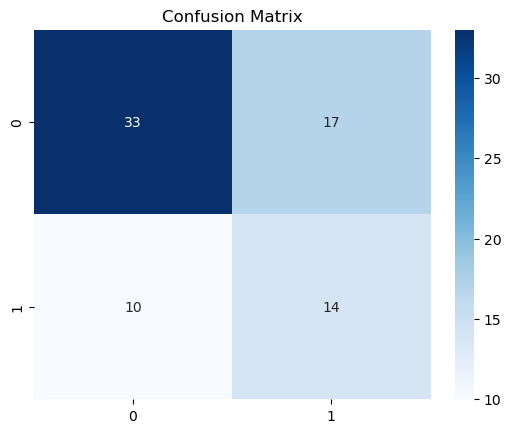

ROC-AUC Score: 0.68


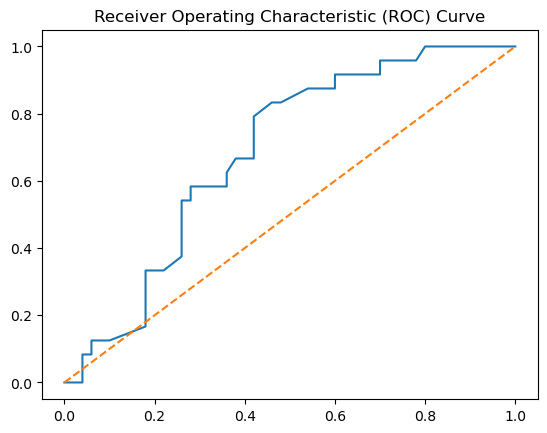

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Predictions for the test data
y_pred = rf_model.predict(val_X)
y_proba = rf_model.predict_proba(val_X)[:, 1]

# Classification report
print(classification_report(val_y, y_pred))

# Confusion matrix
cm = confusion_matrix(val_y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(val_y, y_proba)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# ROC Curve
fpr, tpr, _ = roc_curve(val_y, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()